# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Import Data

In [3]:
drug_df = pd.read_csv("drug200.csv")

In [4]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


We can see that there are no missing/null values in the data set.

In [6]:
drug_df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [7]:
drug_df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [8]:
drug_df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [9]:
drug_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
print('Age skewness: ', drug_df.Age.skew(axis=0, skipna=True))

Age skewness:  0.03030835703000607


In [11]:
print('Na_to_K skewness: ', drug_df.Na_to_K.skew(axis=0, skipna=True))

Na_to_K skewness:  1.039341186028881


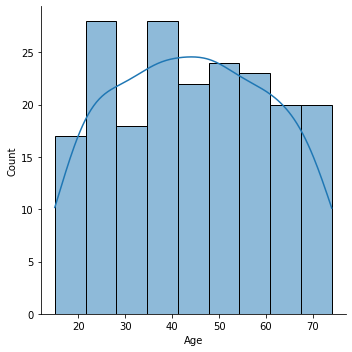

In [16]:
sns.displot(drug_df['Age'], kde=True)

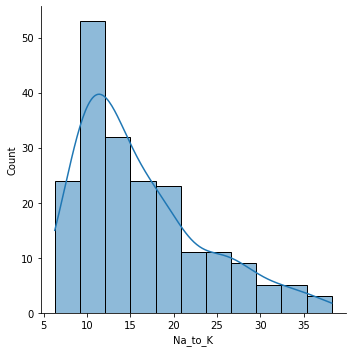

In [17]:
sns.displot(drug_df['Na_to_K'], kde=True)

# Exploratory Data Analysis

In [25]:
fig = px.histogram(drug_df, x='Drug',color='Sex', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Drug Types by Gender')
fig

DrugX are taken by equal numbers of males and females. DrugY mostly taken by females. DrugA, DrugB and drugC are mostly taken by male patients.

In [27]:
fig = px.histogram(drug_df, x='Age',color='Cholesterol', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Age by Cholesterol Level')
fig

- More patients in the 35-39 age group have normal cholesterol levels than any other age group.

- More patients in the 55-59 age group have high cholesterol levels than any other age group.

In [60]:
fig = px.bar(drug_df, x='Age',y='Na_to_K', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='stack', xaxis={'categoryorder':'total descending'},
    title='NA/K Levels by Age')
fig

In [29]:
fig = px.histogram(drug_df, x='Age',color='BP', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Blood Pressure Levels by Age')
fig

Most patients in the 45-49 age group have low blood pressure.

In [31]:
fig = px.histogram(drug_df, x='Age', color='Sex', height=500, width=600)
fig.update_layout(
    template='seaborn', barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Age by Gender')

Most males are in the 45-49 age group. And most females are in the 35-39 and 55-59 age groups.

In [33]:
fig = px.scatter(drug_df, x='Drug',y='Age', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title="Distribution of Patient Ages by Drug Type")
fig

All patients taking Drug B are over the age of 50, and all patients taking Drug A are under 51.

In [34]:
fig = px.histogram(drug_df, x='BP',color='Sex', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Blood Pressure Levels by Age ')
fig

Most patients have high blood pressure.

In [35]:
fig = px.histogram(drug_df, x='Sex',color='Cholesterol', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Gender by Cholesteral Level')
fig

More males have high and normal chelesterol than females.

In [59]:
fig = px.scatter(drug_df, x='Sex',y='Na_to_K', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Na/K Levels by Gender')
fig

- Females have a Na to K ratio between 6.6-38.
- Males have a Na to K ratio between 6.2-35.

In [38]:
fig = px.histogram(drug_df, x='BP',color='Cholesterol', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Blood Pressure levels by Cholesterol Levels')
fig

- 17.5% of patients have high blood pressure and cholesterol. 
- 21% of patients have high blood pressure and normal Cholesterol.
- 15% of patients have low blood pressure and high Cholesterol.
- 6.5% of patients have low blood pressure and normal Cholesterol.
- 18.5% of patients have normal blood pressure and high Cholesterol

<AxesSubplot:title={'center':'High Blood Pressure and High Cholestrol'}, ylabel='Drug'>

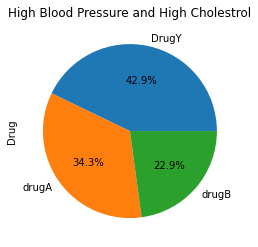

In [46]:
drug_df.loc[(drug_df['BP']=='HIGH') & (drug_df['Cholesterol']=='HIGH'),
            'Drug'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='High Blood Pressure and High Cholestrol')

Most patients with high blood pressure and high cholestrol take Drug Y.

<AxesSubplot:title={'center':'High Blood Pressure and Normal Cholestrol'}, ylabel='Drug'>

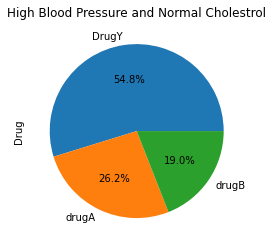

In [45]:
drug_df.loc[(drug_df['BP']=='HIGH') & (drug_df['Cholesterol']=='NORMAL'),
            'Drug'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='High Blood Pressure and Normal Cholestrol')

Most patients with high blood pressure and normal
cholestrol take Drug Y.

<AxesSubplot:title={'center':'High Blood Pressure and Normal Cholestrol'}, ylabel='Drug'>

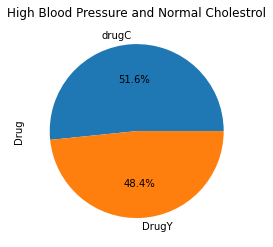

In [47]:
drug_df.loc[(drug_df['BP']=='LOW') & (drug_df['Cholesterol']=='HIGH'),
            'Drug'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='High Blood Pressure and Normal Cholestrol')

<AxesSubplot:title={'center':'High Blood Pressure and Normal Cholestrol'}, ylabel='Drug'>

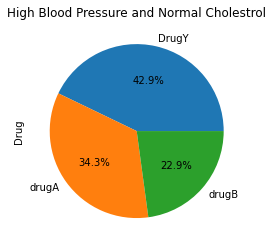

In [49]:
drug_df.loc[(drug_df['BP']=='HIGH') & (drug_df['Cholesterol']=='HIGH'),
            'Drug'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='High Blood Pressure and Normal Cholestrol')

<AxesSubplot:title={'center':'High Blood Pressure and Normal Cholestrol'}, ylabel='Drug'>

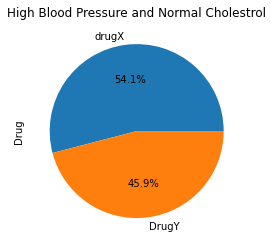

In [50]:
drug_df.loc[(drug_df['BP']=='NORMAL') & (drug_df['Cholesterol']=='HIGH'),
            'Drug'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='High Blood Pressure and Normal Cholestrol')

<AxesSubplot:title={'center':'High Blood Pressure and Normal Cholestrol'}, ylabel='Drug'>

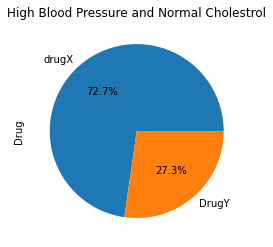

In [51]:
drug_df.loc[(drug_df['BP']=='NORMAL') & (drug_df['Cholesterol']=='NORMAL'),
            'Drug'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='High Blood Pressure and Normal Cholestrol')

In [52]:
fig = px.histogram(drug_df, x='Drug',color='BP', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Drug Type by Blood Pressure Level')
fig

- Patients with low blood presure mostly take drugs X and C.
- Drugs A and B are only taken by patients with low blood pressure.
- Most patients with normal blood pressure take drug X.
- Drug Y is taken by all patients.

In [58]:
fig = px.scatter(drug_df, x='Cholesterol',y='Na_to_K', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Na/K Ratios by Cholesterol Levels')
fig

- Patients with high cholesterol levels have Na_to_K ratios 6.7-38.24.
- Patients with normal cholesterol levels have Na_to_K ratios 6.2-35.63.

In [56]:
fig = px.histogram(drug_df, x='Drug',color='Cholesterol', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='group', xaxis={'categoryorder':'total descending'},
    title='Distribution of Drug Types by Cholesterol Levels')
fig

- Drug X is taken mostly by patients with normal cholesterol levels.
- Drug C is only taken by patients with high cholesterol levels.

In [57]:
fig = px.scatter(drug_df, x='Drug',y='Na_to_K', height=500, width=600)
fig.update_layout(
    template="seaborn",barmode='overlay', xaxis={'categoryorder':'total descending'},
    title='Distribution of Drug Types by Na/K Ratio')
fig

- Drug Y is taken by patients with Na/K ratio over 15.

<AxesSubplot:title={'center':'Na to K under 15 effect on BP'}, ylabel='BP'>

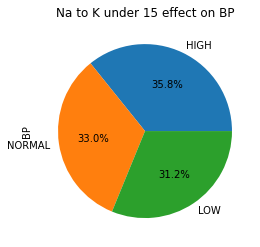

In [65]:
drug_df.loc[(drug_df['Na_to_K']<15),'BP'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Na to K under 15 effect on BP')

<AxesSubplot:title={'center':'Na to K over 15 effect on BP'}, ylabel='BP'>

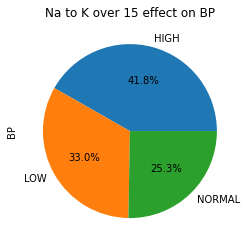

In [64]:
drug_df.loc[(drug_df['Na_to_K']>15),'BP'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Na to K over 15 effect on BP')

- Patients Na/K ratio more than 15 are having more chance of High and low blood pressure.
- Na/K ratio is responsible for the blood pressure falculations

## Conclusion

1. The age of people lies between 15 to 74. Maximum people are of the age of 47. Maximum males are between the 45-49 age and female are between 35-39 and 55-59 age range.
2. The number of male patients are higher than female.
3. Mostly patients have high BP. Mostly patients belong to age group of 45-49 having low BP.
4. 51.5% patients have high Cholesterol.
5. Mostly patients have the sodium to potassium ratio in between 10-12
6. 5 types of drug taken by patients. Mostly patient are taking DrugY.
7. Drug B and Drug A are taken by patients having age more than 50 age and less than 51, respectively.
8. Drug X are taken by equal numbers of males and females. Drug Y mostly taken by females. Drug A, Drug B and Drug C are mostly taken by male blood pressure.
9. If blood pressure is high than they take Drug Y, Drug A and Drug B.
10. Drug Y is the most common drug.
11. Drug C is taken by the patients who having low blood pressure and Drug B and Drug A are taken by high blood pressure patients.
12. The Drug Y is taken by the patients with Na by K ratio higher than 15 and other drugs are taken by those patients with a Na by K ratio less than 15.
13. Patients Na to K ratio more than 15 have a higher chance of High and low blood pressure. Na to K ratio is responsible for the BP falculations.